# Blackbox Optimization with NN driven model

In [1]:
# Python libraries
import os
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
# https://docs.scipy.org/doc/scipy/tutorial/optimize.html#broyden-fletcher-goldfarb-shanno-algorithm-method-bfgs
import scipy.optimize as optimize
from sklearn.metrics import mean_squared_error

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
from ipynb.fs.defs.myfun_load_dataset import *
from ipynb.fs.defs.myfun_models import *
from ipynb.fs.defs.myfun_plot import *

2023-08-27 16:17:36.080406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow/Keras: 2.11.0
sklearn: 1.3.0


# Step 1: Synthetic data

## Data Acquisition

In [2]:
# Load the dataset
par_dir = os.path.dirname(os.getcwd()) # parent dir
dir_name = par_dir + "/NN-interaction"
merged_df, dflist = load_dataset(dir_name, 'post')

In [3]:
# For sake of simplicity conseder only a scene
df = dflist[0] # sequence
scn = df.T[2]  # scene

In [4]:
# Useful params
N = scn['N. vehicles']
tstamps = scn['Tarr']

## Create the model NN

In [5]:
DOE =[[1,2,1]] #Design of experiment

In [6]:
model = create_model(DOE[0])
# model.summary()

## Evaluate the NN in each time interval

In [7]:
# parameters to set
epochs = 100           # An epoch is an iteration over the entire x and y data provided
batch_size = 1       # Number of samples per gradient update.
v0 = 30

In [8]:
t_ann_end, x_ann_end, vel_ann_end = odesolver_ann_scene(model, scn, epochs, batch_size, v0, verbose='auto')

We have 5 time intervals inside [72.44,73.44]

----------------------------------------------------------------------------------------------------
Time interval n.0: [72.44, 72.64]

Epoch 1/100
2/2 [==============================] - 0s 27ms/step - loss: 1059.7025 - mean_absolute_error: 32.0102
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 786.1744 - mean_absolute_error: 27.8849
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 725.7449 - mean_absolute_error: 26.7807
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 669.9498 - mean_absolute_error: 25.7727
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 618.4862 - mean_absolute_error: 24.6996
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 571.0682 - mean_absolute_error: 23.7215
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 527.3293 - mean_absolute_error: 22.7821
Epoch 8/100
2/2 [===============

2/2 [==============================] - 0s 19ms/step - loss: 9.7625 - mean_absolute_error: 2.6348
Epoch 73/100
2/2 [==============================] - 0s 6ms/step - loss: 9.5505 - mean_absolute_error: 2.6675
Epoch 74/100
2/2 [==============================] - 0s 12ms/step - loss: 9.3581 - mean_absolute_error: 2.6669
Epoch 75/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1775 - mean_absolute_error: 2.6367
Epoch 76/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0108 - mean_absolute_error: 2.6657
Epoch 77/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8571 - mean_absolute_error: 2.6378
Epoch 78/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7126 - mean_absolute_error: 2.6384
Epoch 79/100
2/2 [==============================] - 0s 19ms/step - loss: 8.5821 - mean_absolute_error: 2.6641
Epoch 80/100
2/2 [==============================] - 0s 10ms/step - loss: 8.4617 - mean_absolute_error: 2.6394
Epoch 81/100
2/2 [==========

2/2 [==============================] - 0s 18ms/step - loss: 17.7125 - mean_absolute_error: 4.0114
Epoch 15/100
2/2 [==============================] - 0s 15ms/step - loss: 16.4554 - mean_absolute_error: 3.8770
Epoch 16/100
2/2 [==============================] - 0s 8ms/step - loss: 15.2922 - mean_absolute_error: 3.7234
Epoch 17/100
2/2 [==============================] - 0s 6ms/step - loss: 14.2230 - mean_absolute_error: 3.5516
Epoch 18/100
2/2 [==============================] - 0s 14ms/step - loss: 13.2368 - mean_absolute_error: 3.4354
Epoch 19/100
2/2 [==============================] - 0s 16ms/step - loss: 12.3272 - mean_absolute_error: 3.2749
Epoch 20/100
2/2 [==============================] - 0s 10ms/step - loss: 11.4881 - mean_absolute_error: 3.1696
Epoch 21/100
2/2 [==============================] - 0s 26ms/step - loss: 10.7142 - mean_absolute_error: 3.0197
Epoch 22/100
2/2 [==============================] - 0s 10ms/step - loss: 10.0033 - mean_absolute_error: 2.9001
Epoch 23/100
2/2

2/2 [==============================] - 0s 20ms/step - loss: 2.0832 - mean_absolute_error: 1.4053
Epoch 61/100
2/2 [==============================] - 0s 25ms/step - loss: 2.0755 - mean_absolute_error: 1.4116
Epoch 62/100
2/2 [==============================] - 0s 12ms/step - loss: 2.0684 - mean_absolute_error: 1.4056
Epoch 63/100
2/2 [==============================] - 0s 16ms/step - loss: 2.0619 - mean_absolute_error: 1.4113
Epoch 64/100
2/2 [==============================] - 0s 14ms/step - loss: 2.0561 - mean_absolute_error: 1.4112
Epoch 65/100
2/2 [==============================] - 0s 16ms/step - loss: 2.0508 - mean_absolute_error: 1.4111
Epoch 66/100
2/2 [==============================] - 0s 11ms/step - loss: 2.0459 - mean_absolute_error: 1.4110
Epoch 67/100
2/2 [==============================] - 0s 8ms/step - loss: 2.0414 - mean_absolute_error: 1.4109
Epoch 68/100
2/2 [==============================] - 0s 6ms/step - loss: 2.0370 - mean_absolute_error: 1.4062
Epoch 69/100
2/2 [=======

## Create synthetic data

In [9]:
# Take samples from the simulation
Nt = len(t_ann_end)  # timestamps original dataset
M = 5                # Number of samples
Mt = int(Nt/M)       # timestamp to take equispaced samples

idx = list(range(0,Nt,1+Mt))    # indexes to extract
tshat, Xhat = np.array(t_ann_end)[idx], [traj[idx] for traj in np.array(x_ann_end)]

In [10]:
idx

[0, 5, 10, 15, 20]

## Plot

In [11]:
# Params for the plot
trajs = [scn['Xarr'], np.array(x_ann_end)]
labels_plot = ["true","nn sim"]
title = f"Trajs simulated by NN driven LWR model"

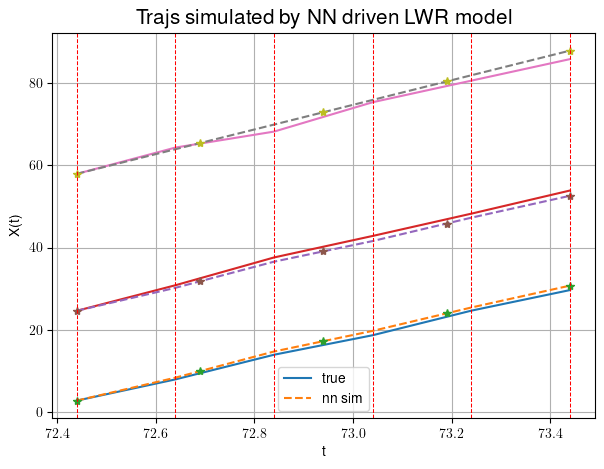

In [12]:
# fig 
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

for veh in range(0,N):
    ax.plot(tstamps, scn['Xarr'][veh])
    ax.plot(t_ann_end, x_ann_end[veh], '--')
    ax.plot(tshat, Xhat[veh], '*')

for ts in tstamps:
    ax.axvline(x = ts, color = 'red', linestyle = '--', linewidth=0.75)
    
# Annotate the name of each variable at the last value
plot_annotation(ax, scn, trajs, scale=1.004)

ax.set_xlabel("t")
ax.set_ylabel("X(t)")
ax.set_title(title, fontsize=15)
# Limits for the plot
#plot_limits(ax, scn, trajs, xbal=0.01, ybal=0.05)
plt.legend(labels_plot)
plt.grid()
plt.show()

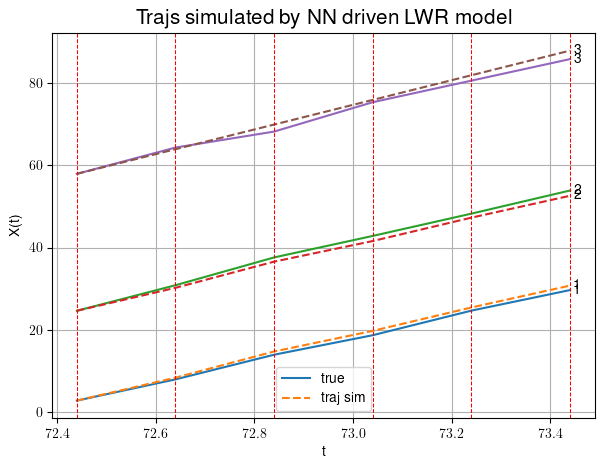

In [13]:
# plot function
t_ann_matched, trajs_ann_matched = match_timestamps_scene(t_ann_end, x_ann_end)
tscale = 1+(tstamps[-1]-tstamps[0])/10000
plot_scn(scn, traj_sim = trajs_ann_matched, xbal=0.01, ybal=0.05, scale=tscale)

# Step 2: Optimization with blackbox approach

In [14]:
# definition with freezed parameteres regarding the scene.
def f_wrapped(v0):
    t_ann_end, x_ann_end, _ = odesolver_ann_scene(model, scn, epochs, batch_size, v0, verbose=0)
    return x_ann_end

In [15]:
def loss_fun(v0):
    "Loss function"
    
    X = f_wrapped(v0)
    Xupd = [traj[idx] for traj in np.array(X)] # extracting the same index as in X
        
    mse = mean_squared_error(Xhat, Xupd)

    return mse

In [16]:
# using the parameters used in the creation of synthetic data the loss must be 0!
mse = loss_fun(v0)

We have 5 time intervals inside [72.44,73.44]

----------------------------------------------------------------------------------------------------
Time interval n.0: [72.44, 72.64]

        * y_true: [25.85001228 31.10049693]
        * y_pred: [28.440977096557617, 28.440977096557617]

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Time interval n.1: [72.64, 72.84]

        * y_true: [30.00006309 33.82077482]
        * y_pred: [31.853309631347656, 31.853309631347656]

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Time interval n.2: [72.84, 73.04]

        * y_true: [23.75011307 26.19081077]
        * y_pred: [25.092815399169922, 25.092815399169922]

-------------------------------

In [17]:
mse

0.005144838069593043

In [18]:
# initial_guess = [30]

# #result = optimize.minimize(loss_fun, initial_guess, method="Nelder-Mead", tol = 1e0, options={'maxiter':3})
# result = optimize.minimize(loss_fun, initial_guess, method="Powell", tol = 10000)
# if result.success:
#     fitted_params = result.x
#     print(fitted_params)
# else:
#     raise ValueError(result.message)

In [19]:
fitted_params

NameError: name 'fitted_params' is not defined

In [ ]:
result.message